## Ejemplo de Segmentación/Clustering de pixeles (dentro de una imagen)

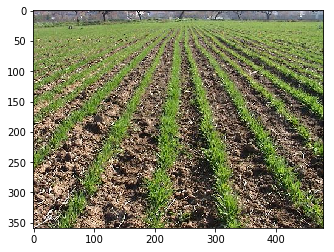

In [3]:
#!pip install opencv--python #por única vez
import cv2
campo_cv=cv2.imread('Campo.png')
campo=campo_cv.copy()
campo[:,:,[2,1,0]]=campo_cv #De BGR a RGB

from matplotlib import pyplot as plt
plt.imshow(campo)
plt.show()             

In [5]:
# Armado de la base de pixeles como Data Frame
import numpy as np
dims=campo.shape
cant_filas=dims[0]
cant_columnas=dims[1]
cant_pixeles=cant_filas*cant_columnas
data0=np.zeros([cant_pixeles,4],dtype='int')
for f in range(cant_filas):
    for c in range(cant_columnas):
        nro=f*cant_columnas+c
        data0[nro,0]=nro
        data0[nro,1:4]=campo[f,c,:]

import pandas as pd
df = pd.DataFrame(data0, columns=["pixel_id","rojo","verde","azul"])

print(df.shape)
print('Base de pixeles:')
df.head()   

(171961, 4)
Base de pixeles:


,pixel_id,rojo,verde,azul
0,0,186,155,161
1,1,202,171,176
2,2,190,159,165
3,3,203,172,177
4,4,189,160,164


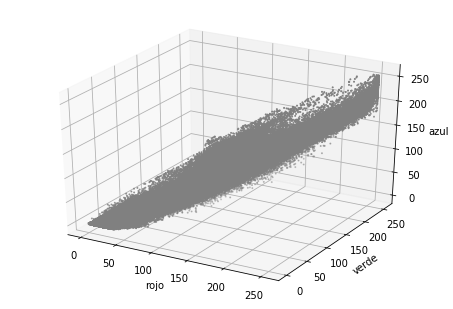

In [7]:
#Visualización de los datos
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

variables=["rojo","verde","azul"]
ax.scatter(df[variables[0]].values, df[variables[1]].values, df[variables[2]].values,c='gray', s=1)
ax.set_xlabel(variables[0])
ax.set_ylabel(variables[1])
ax.set_zlabel(variables[2])
plt.show()

# Dos algoritmos de Clustering:

**- K-medias**

* ES necesario definirle la cantidad de grupos/clusters, es un hiperparámetro del algoritmo. 

**- DBSCAN: Density Based Spatial Clustering of Aplications with Noise**

* NO es necesario definirle la cantidad de grupos/clusters 
* Hiperparámetros: eps (o radio de búsqueda) y min_samples (Rule of thumb: min_samples ≥ D + 1, donde D es la cantidad de variables) 

In [8]:
# Librerías para Clustering
from sklearn.cluster import KMeans, DBSCAN
from sklearn import preprocessing
from sklearn.metrics import silhouette_score

## K-medias

* ES necesario definirle la cantidad de grupos/clusters (n_clusters), es un hiperparámetro del algoritmo. En la implementación de sklearn también se puede elegir la cantidad de veces que tira las semilllas (n_init), y luego elige el mejor resultado según inertia (suma de los cuadrados de las distancias al cluter más cercano). 

In [9]:
# class sklearn.cluster.KMeans(n_clusters=8, init=’k-means++’, n_init=10, max_iter=300, 
#                        tol=0.0001, precompute_distances=’auto’, verbose=0, random_state=None, 
#                        copy_x=True, n_jobs=None, algorithm=’auto’)
df_pix=df.drop('pixel_id',axis=1)
kmedias3=KMeans(n_clusters=3).fit(df_pix)
print('Suma de los cuadrados de las distancias al clusters / Inertia: ', kmedias3.inertia_)

Suma de los cuadrados de las distancias al clusters / Inertia:  308726464.90626526


### Elección de la cantidad de grupos/clusters 

Una forma de seleccionar la cantidad más adecuada de clusters es probar varias cantidades y usar el criterio del codo: "elbow method", utilizando una medida de ajuste que puede ser Inertia. 

Text(0.5,1,'Inertia of k-Means versus number of clusters')

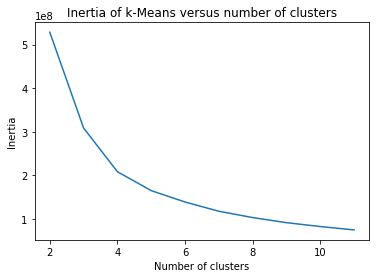

In [10]:
#Prueba: para elegir el hiperparámetro n_clusters, variando de 2 a 11 clusters
scores = [KMeans(n_clusters=i+2).fit(df_pix).inertia_ for i in range(10)]
plt.plot(np.arange(2, 12), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

In [49]:
# Se agrupan los datos usando Kmedias en 4 clusters (cantidad elegida según el criterio del codo (Elbow method))
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_pix)
df_clusters=df.copy()
df_clusters['kmedias_4']=kmeans.labels_
df_clusters.head()

,pixel_id,rojo,verde,azul,kmedias_4
0,0,186,155,161,1
1,1,202,171,176,1
2,2,190,159,165,1
3,3,203,172,177,1
4,4,189,160,164,1


### Visualización
En el espacio RGB: Rojo vs Verde vs Azul:

se grafican de a dos (dimensión 2)


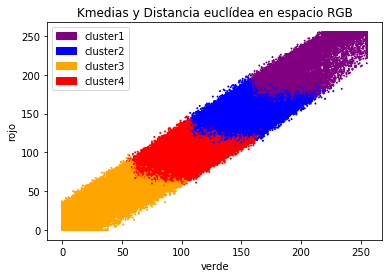

In [50]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

colores=['purple','blue','orange','red']
variables=["rojo","verde","azul"]

variable1=variables[1]
variable2=variables[0]

f1 = df_clusters[variable1].values
f2 = df_clusters[variable2].values
f3 = df_clusters.kmedias_4

asignar=[]
l=len(f3)
print('se grafican de a dos (dimensión 2)')

for k in range(l): #for index, row in filtered_data.iterrows():
    asignar.append(colores[f3[k]-1])
    
plt.scatter(f1, f2, c=asignar, s=1)
plt.xlabel(variable1)
plt.ylabel(variable2)
patch1 = mpatches.Patch(color=colores[0], label='cluster1')
patch2 = mpatches.Patch(color=colores[1], label='cluster2')
patch3 = mpatches.Patch(color=colores[2], label='cluster3')
patch4 = mpatches.Patch(color=colores[3], label='cluster4')
plt.legend(handles=[patch1,patch2,patch3,patch4])
plt.title('Kmedias y Distancia euclídea en espacio RGB')
plt.show()

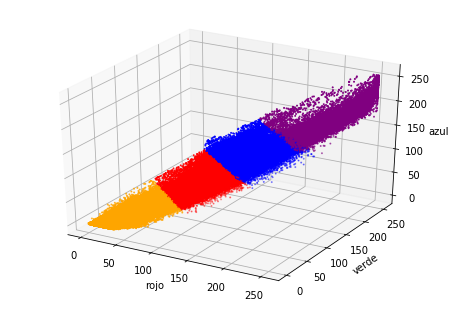

In [51]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(df[variables[0]].values, df[variables[1]].values, df[variables[2]].values,c=asignar, s=1)
ax.set_xlabel(variables[0])
ax.set_ylabel(variables[1])
ax.set_zlabel(variables[2])
plt.show()

Text(0.5,1,'Inertia of Cosine k-Means versus number of clusters')

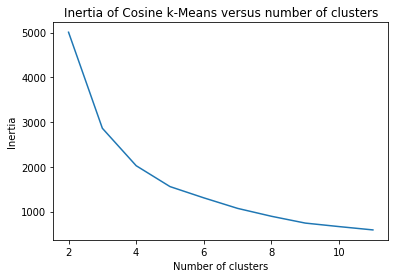

In [18]:
#Distancia del coseno (normalizar los vectores)
normalized_vectors = preprocessing.normalize(df_pix)
scores = [KMeans(n_clusters=i+2).fit(normalized_vectors).inertia_ for i in range(10)]
plt.plot(np.arange(2, 12), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of Cosine k-Means versus number of clusters")

In [52]:
normalized_kmeans = KMeans(n_clusters=3)
normalized_kmeans.fit(normalized_vectors)
df_clusters['kmedias_cos_3']=normalized_kmeans.labels_
df_clusters.head()

,pixel_id,rojo,verde,azul,kmedias_4,kmedias_cos_3
0,0,186,155,161,1,0
1,1,202,171,176,1,0
2,2,190,159,165,1,0
3,3,203,172,177,1,0
4,4,189,160,164,1,0


### Visualización de Kmedias (3 clusters) con la distancia del coseno (vectores normalizados)
En el espacio RGB: Rojo vs Verde vs Azul:

se grafican de a dos (dimensión 2)


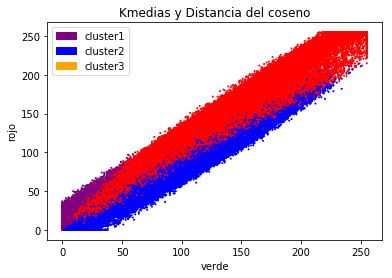

In [53]:
f3 = df_clusters.kmedias_cos_3

asignar=[]
l=len(f3)
print('se grafican de a dos (dimensión 2)')

for k in range(l): #for index, row in filtered_data.iterrows():
    asignar.append(colores[f3[k]-1])
    
plt.scatter(f1, f2, c=asignar, s=1)
plt.xlabel(variable1)
plt.ylabel(variable2)
patch1 = mpatches.Patch(color=colores[0], label='cluster1')
patch2 = mpatches.Patch(color=colores[1], label='cluster2')
patch3 = mpatches.Patch(color=colores[2], label='cluster3')
plt.legend(handles=[patch1,patch2,patch3])
plt.title('Kmedias y Distancia del coseno')
plt.show()

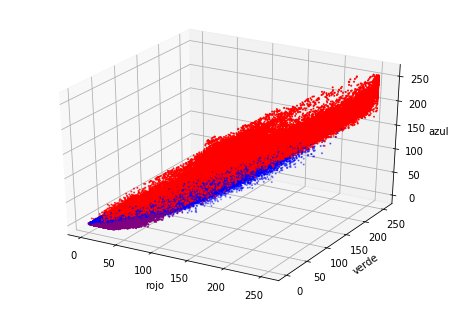

In [54]:
fig = pyplot.figure()
ax = Axes3D(fig)

ax.scatter(df[variables[0]].values, df[variables[1]].values, df[variables[2]].values,c=asignar, s=1)
ax.set_xlabel(variables[0])
ax.set_ylabel(variables[1])
ax.set_zlabel(variables[2])
plt.show()

### Visualización en la imagen

(359, 479, 3)


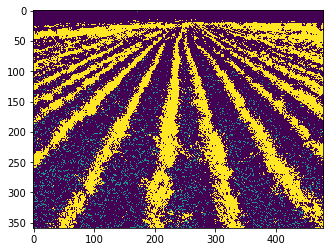

In [55]:
a=campo.shape
print(a)
clasif=np.zeros(a[0:2],dtype='int')
nro_pix=0
for i in range(a[0]): #filas
    for j in range(a[1]): #columnas
        clasif[i,j]=f3[nro_pix] 
        nro_pix+=1
plt.imshow(clasif)

## DBSCAN: Density Based Spatial Clustering of Aplications with Noise

* NO es necesario definirle la cantidad de grupos/clusters 
* Hiperparámetros: eps (o radio de búsqueda) y min_samples (Rule of thumb: min_samples ≥ D + 1, donde D es la cantidad de variables) 

In [56]:
#min_samples = df_pix.shape[1]+1 #  Rule of thumb: minPts ≥ D + 1
min_samples=20
dbscan = DBSCAN(eps=3.5, min_samples=min_samples).fit(df_pix)
df_clusters=df_kmedias.copy()
df_clusters['dbscan']=dbscan.labels_

from collections import Counter
print('cantidad de datos por cluster: ',Counter(dbscan.labels_))
df_clusters.head()

cantidad de datos por cluster:  Counter({0: 160332, -1: 11378, 7: 65, 5: 39, 1: 31, 8: 24, 3: 23, 10: 20, 6: 17, 2: 15, 9: 12, 4: 5})


,pixel_id,rojo,verde,azul,kmedias_4,kmedias_cos_3,dbscan
0,0,186,155,161,3,0,-1
1,1,202,171,176,3,0,-1
2,2,190,159,165,3,0,-1
3,3,203,172,177,3,0,-1
4,4,189,160,164,3,0,-1


cantidad de clusters usando DBSCAN: 10


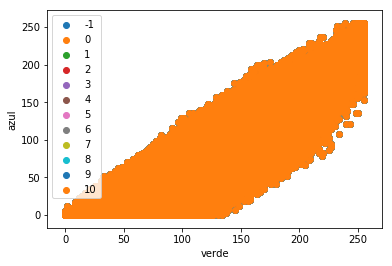

In [57]:
print('cantidad de clusters usando DBSCAN:', max(dbscan.labels_))
import matplotlib.pyplot as plt

v1=variables[1]
v2=variables[2]
target = dbscan.labels_

f, ax = plt.subplots(1)
for i in np.unique(target):
    mask = target == i
    plt.scatter(df[v1], df[v2], label=i)
ax.set_xlabel(v1)
ax.set_ylabel(v2)
ax.legend()
plt.show()

## Otro algoritmo de clustering: Mean Shift
* NO es necesario definirle la cantidad de grupos/clusters 
* NO es escalable, computacionalmente es muy pesado. Cada dato tienen un proceso iterativo en donde en cada iteración considera los vecinos a menos de un radio de distancia.
* Hipeparámetros: minsize (tamaño mínimo de los clusters), radio (de cobertura y cálculo de media)